In [33]:
%matplotlib inline

In [34]:
import pandas as pd
from graph_tool import load_graph
from graph_tool.topology import kcore_decomposition
from graph_helpers import get_subcores
from subcore import find_nodes_to_promote

In [35]:
graph_name = 'grqc'
g = load_graph('data/{}/graph.gt'.format(graph_name))

In [36]:
kcore = kcore_decomposition(g)

In [37]:
subcores = get_subcores(g, kcore)

In [38]:
sc_sizes = pd.Series(list(map(len, subcores)))

In [39]:
num_promotable_nodes = pd.Series(list(map(lambda nodes: len(find_nodes_to_promote(g, nodes, kcore)), subcores)))

In [40]:
df = pd.DataFrame.from_dict({'size': sc_sizes, 'n_prom': num_promotable_nodes})

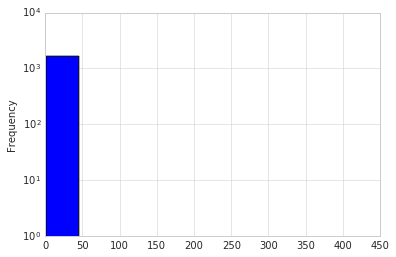

In [41]:
sc_sizes.plot('hist', logy=True)

In [47]:
df['saturation_ratio'] =  (df['size'] - df['n_prom']) / df['size']

In [50]:
df[df['saturation_ratio'] < 1].describe()

,n_prom,size,n_prom/size,saturation_ratio
count,235.000000,235.000000,235.000000,235.000000
mean,5.336170,9.719149,0.713966,0.286034
std,12.583472,35.836611,0.291326,0.291326
min,1.000000,2.000000,0.100000,0.000000
25%,2.000000,3.000000,0.500000,0.000000
50%,3.000000,4.000000,0.666667,0.333333
75%,4.000000,7.000000,1.000000,0.500000
max,149.000000,442.000000,1.000000,0.900000


In [ ]:
# saturation ratio
# median: 33%
# mean: 28%